In [1]:
import os
from scripts import check_claim_structure as cs
from scripts import table
from scripts import utils
from scripts import eval

In [2]:
def process_datasets(tables_path, requests_path):
    dataset_results = []

    # Iterate through all directories in dataset_path
    for directory in os.listdir(requests_path):
        if os.path.isdir(os.path.join(requests_path, directory)):
            answers_path = os.path.join(requests_path, directory, 'answers')
            claims_path = os.path.join(requests_path, directory, 'claims.json')

            claims = cs.extract_answers(answers_path, claims_path)
            extracted_tables = table.load_tables_from_json(tables_path)

            results = eval.evaluate_extracted_articles(claims, extracted_tables)
            results = list(results.items())
            results.sort()

            dataset_results.append(results)

    return dataset_results

tables_file_path = 'experiments/extracted_tables/cs_tables.json'
dataset_path = 'experiments/output/cs_dataset'

d_results = process_datasets(tables_file_path, dataset_path)

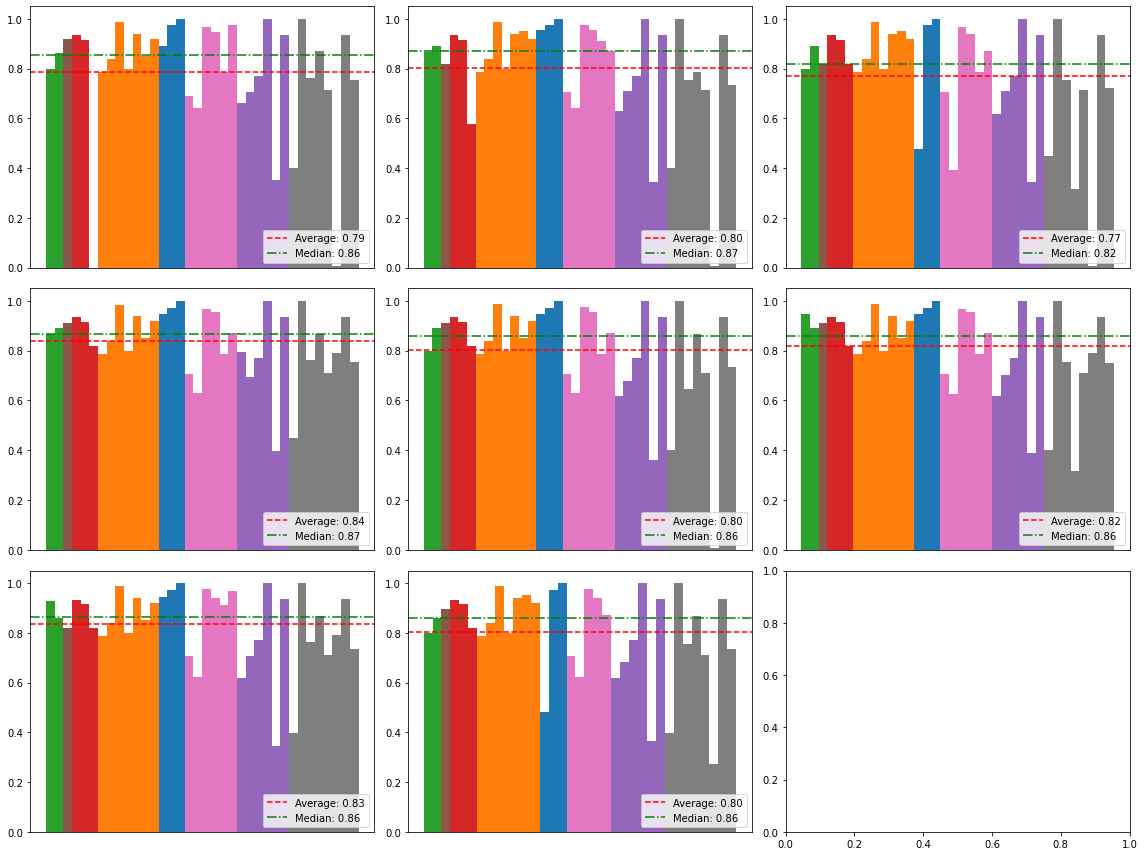

In [3]:
utils.plot_dataset_results(d_results)

In [4]:
answers_path = 'experiments/output/cs_dataset/7/answers'
output_path = 'experiments/output/cs_dataset/7/claims.json'
tables_file_path = 'experiments/extracted_tables/cs_tables.json'

claims = cs.extract_answers(answers_path, output_path)
extracted_tables = table.load_tables_from_json(tables_file_path)

In [5]:
article_id = '1701.08288'
table_idx = 0

utils.print_claims(claims, print_all=False, article_id=article_id)

Article ID: 1701.08288
	Table Index: 0
		Extracted Claims:
			specifications:
				Dataset: Allsports,
				Accuracy: F1-measure, 0.9,
				Method: MinMax,
			measure: # crowdsourced questions
			outcome: 13.6K


			specifications:
				Dataset: Allsports,
				Accuracy: F1-measure, 0.9,
				Method: DENSE,
			measure: # crowdsourced questions
			outcome: 16.0K


			specifications:
				Dataset: Allsports,
				Accuracy: F1-measure, 0.9,
				Method: PC-Pivot,
			measure: # crowdsourced questions
			outcome: 21.7K


			specifications:
				Dataset: Allsports,
				Accuracy: F1-measure, 0.9,
				Method: PERC,
			measure: # crowdsourced questions
			outcome: 11.7K


			specifications:
				Dataset: Allsports,
				Accuracy: F1-measure, 0.9,
				Method: PERC,
				Comparison: MinMax,
			measure: % crowdsourcing cost reduction
			outcome: 13.97%


			specifications:
				Dataset: Allsports,
				Accuracy: F1-measure, 0.9,
				Method: PERC,
				Comparison: DENSE,
			measure: % crowdsourcing cost reduction


In [6]:
html_table = extracted_tables[article_id][table_idx]['table']
table_vales, table_pd = cs.get_table_values(html_table)

table_pd[0].head()

datasets accuracy: # crowdsourced questions                  \
  Unnamed: 0_level_1       F1-                   MinMax  DENSE PC-Pivot   
  Unnamed: 0_level_2   measure                      [9]   [19]     [23]   
0          Allsports       0.9                    13.6K  16.0K    21.7K   
1         Gymnastics       0.9                     1.3K   1.5K     1.8K   
2          Landmarks       0.9                    11.0K   8.0K      16K   
3               Cora       0.8                    22.5K  14.0K        ✗   

                % crowdsourcing cost                   
         PERC reduction by PERC over                   
  [this work]                 MinMax   DENSE PC-Pivot  
0       11.7K                 13.97%  26.87%   46.08%  
1        0.8K                 38.46%  46.67%   55.56%  
2        5.9K                 46.36%  26.25%   63.12%  
3        7.2K                 68.00%  48.57%        ✗

In [7]:
html_table = extracted_tables[article_id][table_idx]['table']
table_values, table_pd = cs.get_table_values(html_table)

table_values

['datasets',
 '0.9',
 '% crowdsourcing cost reduction by PERC over MinMax',
 '# crowdsourced questions PC-Pivot [23]',
 '0.8',
 '7.2K',
 '# crowdsourced questions PERC [this work]',
 '% crowdsourcing cost reduction by PERC over PC-Pivot',
 'Gymnastics',
 '8.0K',
 '11.7K',
 '0.8K',
 '26.25%',
 '46.08%',
 '63.12%',
 'Landmarks',
 '16K',
 '14.0K',
 '1.5K',
 '13.97%',
 '# crowdsourced questions MinMax [9]',
 'Allsports',
 '# crowdsourced questions DENSE [19]',
 '13.6K',
 '22.5K',
 '16.0K',
 '38.46%',
 '55.56%',
 '68.00%',
 '✗',
 '1.3K',
 '26.87%',
 '21.7K',
 '48.57%',
 'Cora',
 '46.36%',
 '46.67%',
 '% crowdsourcing cost reduction by PERC over DENSE',
 '11.0K',
 '5.9K',
 '1.8K',
 'accuracy: F1- measure']

In [8]:
claim_values = claims[article_id][table_idx]['extracted_claims']
_, _, values_extracted = cs.count_specifications(claim_values)

values_extracted

['# crowdsourced questions',
 '% crowdsourcing cost reduction',
 '0.8K',
 '1.3K',
 '1.5K',
 '1.8K',
 '11.0K',
 '11.7K',
 '13.6K',
 '13.97%',
 '14.0K',
 '16.0K',
 '16K',
 '21.7K',
 '22.5K',
 '26.25%',
 '26.87%',
 '38.46%',
 '46.08%',
 '46.36%',
 '46.67%',
 '48.57%',
 '5.9K',
 '55.56%',
 '63.12%',
 '68.00%',
 '7.2K',
 '8.0K',
 'Accuracy',
 'Allsports',
 'Comparison',
 'Cora',
 'DENSE',
 'Dataset',
 'F1-measure, 0.8',
 'F1-measure, 0.9',
 'Gymnastics',
 'Landmarks',
 'Method',
 'MinMax',
 'PC-Pivot',
 'PERC']

In [9]:
similarities, similarity_scores = eval.find_similar_strings(table_vales, values_extracted)

In [10]:
similarities

{'datasets': ['Dataset'],
 '0.9': [],
 '% crowdsourcing cost reduction by PERC over MinMax': ['% crowdsourcing cost reduction',
  'PERC',
  'MinMax'],
 '# crowdsourced questions PC-Pivot [23]': ['# crowdsourced questions',
  'PC-Pivot'],
 '0.8': ['0.8K'],
 '7.2K': ['7.2K'],
 '# crowdsourced questions PERC [this work]': ['# crowdsourced questions',
  'PERC'],
 '% crowdsourcing cost reduction by PERC over PC-Pivot': ['% crowdsourcing cost reduction',
  'PERC',
  'PC-Pivot'],
 'Gymnastics': ['Gymnastics'],
 '8.0K': ['8.0K'],
 '11.7K': ['11.7K'],
 '0.8K': ['0.8K'],
 '26.25%': ['26.25%'],
 '46.08%': ['46.08%'],
 '63.12%': ['63.12%'],
 'Landmarks': ['Landmarks'],
 '16K': ['16K'],
 '14.0K': ['14.0K'],
 '1.5K': ['1.5K'],
 '13.97%': ['13.97%'],
 '# crowdsourced questions MinMax [9]': ['# crowdsourced questions', 'MinMax'],
 'Allsports': ['Allsports'],
 '# crowdsourced questions DENSE [19]': ['# crowdsourced questions', 'DENSE'],
 '13.6K': ['13.6K'],
 '22.5K': ['22.5K'],
 '16.0K': ['16.0K'],
 '3

In [11]:
similarity_scores

{'datasets': 0.9333333333333333,
 '0.9': 0.0,
 '% crowdsourcing cost reduction by PERC over MinMax': 0.9130434782608695,
 '# crowdsourced questions PC-Pivot [23]': 0.9295774647887324,
 '0.8': 0.8571428571428571,
 '7.2K': 1.0,
 '# crowdsourced questions PERC [this work]': 0.8285714285714286,
 '% crowdsourcing cost reduction by PERC over PC-Pivot': 0.9166666666666666,
 'Gymnastics': 1.0,
 '8.0K': 1.0,
 '11.7K': 1.0,
 '0.8K': 1.0,
 '26.25%': 1.0,
 '46.08%': 1.0,
 '63.12%': 1.0,
 'Landmarks': 1.0,
 '16K': 1.0,
 '14.0K': 1.0,
 '1.5K': 1.0,
 '13.97%': 1.0,
 '# crowdsourced questions MinMax [9]': 0.9393939393939394,
 'Allsports': 1.0,
 '# crowdsourced questions DENSE [19]': 0.9230769230769231,
 '13.6K': 1.0,
 '22.5K': 1.0,
 '16.0K': 1.0,
 '38.46%': 1.0,
 '55.56%': 1.0,
 '68.00%': 1.0,
 '✗': 0.0,
 '1.3K': 1.0,
 '26.87%': 1.0,
 '21.7K': 1.0,
 '48.57%': 1.0,
 'Cora': 1.0,
 '46.36%': 1.0,
 '46.67%': 1.0,
 '% crowdsourcing cost reduction by PERC over DENSE': 0.9111111111111111,
 '11.0K': 1.0,
 '5.

In [ ]:
claim_values = claims[article_id][table_idx]['extracted_claims']
_, _, values_extracted = cs.count_specifications(claim_values)

similarities, similarity_scores = eval.find_similar_strings(table_vales, values_extracted)